In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
data = pd.read_csv('mnist_test.csv')

In [ ]:
data = np.array(data)
np.random.shuffle(data)

In [ ]:
m, n = data.shape
data_test = data[0:1000,:].T
X_test = data_test[1:1000,:]/255
y_test = data_test[0]

data_train = data[1000:,:].T
X_train = data_train[1:,:]/255
y_train = data_train[0]  

In [ ]:
def ReLU(Z):
  return np.maximum(0,Z)

def softmax(Z):
  return np.exp(Z)/np.sum(np.exp(Z),0)  

def init_prams():
  W1 = np.random.rand(10,784) - 0.5
  b1 = np.random.rand(10,1) - 0.5

  W2 = np.random.rand(10,10) - 0.5
  b2 = np.random.rand(10,1) - 0.5

  return W1, b1, W2, b2

def forward_prop(W1, b1, W2, b2, X):
  Z1 = np.dot(W1,X) + b1
  A1 = ReLU(Z1)  

  Z2 = np.dot(W2,A1) + b2
  A2 = softmax(Z2) 

  return Z1, A1, Z2, A2

def one_hot(y):
  one_hot_y = np.zeros((y.size,y.max() + 1))
  one_hot_y[np.arange(y.size),y] = 1
  return one_hot_y.T

def deriv_ReLU(Z):
  return Z>0

def back_prop(Z1, A1, Z2, A2, W2, X, y):
  m = y.size
  one_hot_y = one_hot(y)  
  dZ2 = A2 - one_hot_y
  dW2 = 1/m * np.dot(dZ2, A1.T)
  db2 = 1/m * np.sum(dZ2)
  dZ1 = np.dot(W2.T, dZ2) * deriv_ReLU(Z1)

  dW1 = 1/m * np.dot(dZ1, X.T)
  db1 = 1/m * np.sum(dZ1)

  return dW1, db1, dW2, db2 

def update_prams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha ):

  W1 = W1 - alpha*dW1
  b1 = b1 - alpha*db1

  W2 = W2 - alpha*dW2
  b2 = b2 - alpha*db2

  return W1, b1, W2, b2
  



In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, y):
  print(predictions  ,y)
  return np.sum(predictions == y) / y.size

def gradient_descent(X, y, iterations, alpha):

  W1, b1, W2, b2 = init_prams()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, y)
    W1, b1, W2, b2 = update_prams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    if i % 20 == 0:
      print("iterations:  ",i)
      print("accuracy:   ",get_accuracy(get_predictions(A2), y))
  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 500, 0.5)

In [ ]:
#test
_, _, _, A2 = forward_prop(W1, b1, W2, b2, X_test[:,1:2])

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


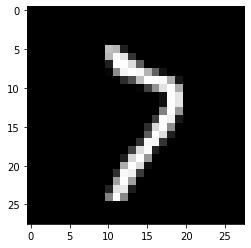

In [ ]:
test_prediction(230,W1,b1,W2,b2)

In [ ]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, y_test)

[8 8 1 2 6 0 2 5 0 1 5 8 8 3 7 2 8 5 0 6 0 4 3 2 2 7 3 4 1 9 1 9 0 9 5 3 6
 6 0 0 0 7 6 7 6 7 8 5 8 4 0 0 8 1 0 2 8 9 6 4 4 8 5 1 0 7 5 7 3 8 8 9 8 1
 6 0 3 7 4 7 6 1 1 1 7 2 0 4 8 4 4 5 5 5 9 6 8 7 4 7 0 3 9 1 5 2 7 0 7 8 4
 2 4 7 3 7 7 4 6 5 3 9 5 4 7 7 9 6 2 7 7 3 7 8 1 3 8 0 5 6 6 9 6 2 2 2 1 4
 1 5 2 8 3 2 8 5 1 0 2 8 8 8 7 7 4 0 6 6 1 6 3 8 4 8 8 1 6 4 1 0 7 1 0 2 3
 1 2 7 0 0 9 7 7 0 8 2 4 4 1 0 1 8 8 7 4 4 9 0 8 2 1 3 5 0 2 4 3 8 5 2 9 9
 0 2 5 1 4 9 1 4 0 9 4 3 7 7 0 0 1 6 5 5 9 2 4 1 2 3 7 7 7 4 9 0 0 0 0 8 1
 0 4 8 1 7 0 6 1 0 3 1 2 7 9 3 1 2 6 0 3 7 7 4 5 6 8 6 0 2 5 0 0 6 8 2 6 9
 0 5 0 6 4 1 1 6 3 2 3 5 5 4 2 0 0 5 3 4 4 1 1 0 3 7 1 9 0 8 1 2 5 6 8 7 9
 2 6 4 2 1 8 7 5 1 9 5 4 4 0 9 2 8 2 1 0 5 3 1 9 0 7 6 9 7 7 8 4 0 3 9 7 4
 7 8 4 7 7 1 3 3 8 3 9 0 9 3 5 0 4 1 3 2 3 5 9 9 8 7 7 6 8 5 2 1 0 6 4 7 6
 7 5 7 2 4 0 9 1 2 3 9 8 6 1 2 5 2 7 8 5 9 6 9 4 8 7 6 1 7 4 2 1 1 1 5 6 7
 6 9 1 7 0 3 0 3 1 9 0 5 8 3 6 1 8 4 8 4 7 0 4 0 7 2 2 0 1 4 9 4 1 1 8 1 8
 1 1 4 8 5 4 5 4 7 5 7 0 

0.894